In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

In [3]:
# load results
#results = pickle.load( open( "results_exp_mnist_low_sample.p", "rb" ) )
# if the file is saved from python 2
results = pickle.load(open("results_exp_mnist_full.p", "rb"), encoding='latin1')
deltalist = results[0]
powerlist = results[1]
powerlist_oracle = results[2]

cdflist = results[3]
cdflist_oracle = results[4]

powerlist_x = results[5]
cdflist_x = results[6]

powerlistT = np.array(powerlist).T

print(powerlistT)

print(powerlist_x)

[[0.048 0.112 0.266 0.412 0.552 0.296 0.656 0.86  0.754 0.576]
 [0.072 0.224 0.338 0.42  0.584 0.462 0.822 0.754 0.996 0.95 ]
 [0.058 0.222 0.36  0.496 0.488 0.448 0.768 0.836 0.994 0.974]
 [0.056 0.356 0.358 0.53  0.512 0.624 0.84  0.894 0.996 0.998]
 [0.054 0.402 0.36  0.474 0.52  0.454 0.842 0.92  1.    0.998]]
[0.060000000000000005, 0.14, 0.09999999999999999, 0.05, 0.08, 0.09999999999999999, 0.14, 0.18000000000000002, 0.4, 0.24000000000000002]


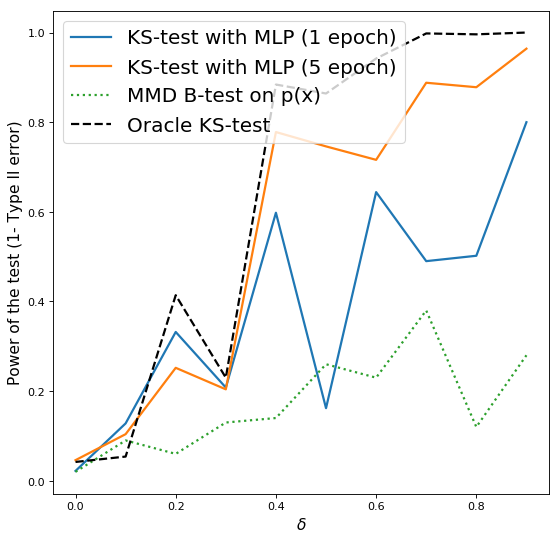

In [21]:
#plot figures
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

num_epoch = 1
legendslist=[]
# plot the comparison
for ind,item in enumerate(powerlistT):
    if ind ==0 or ind ==2:
        plt.plot(deltalist,item,linewidth=2)
        legendslist.append('KS-test with MLP ('+repr(num_epoch)+' epoch)')
    num_epoch += 2
    


plt.plot(deltalist,powerlist_x,linewidth=2,linestyle=':')
plt.plot(deltalist,powerlist_oracle,linewidth=2, color='k',linestyle='--')

legendslist.append('MMD B-test on p(x)')
legendslist.append('Oracle KS-test')
plt.xlabel('$\delta$', fontsize=14)
plt.ylabel('Power of the test (1- Type II error)',fontsize=14)
plt.legend(legendslist, loc='best',fontsize=18)

#plt.title('Comparing the power at 0.05 level of significance',fontsize=14)

plt.show()

fig.savefig("Hypothesis-Testing-power-as-we-train-more.pdf", bbox_inches='tight')

In [4]:
# plot the QQ-plot for different levels

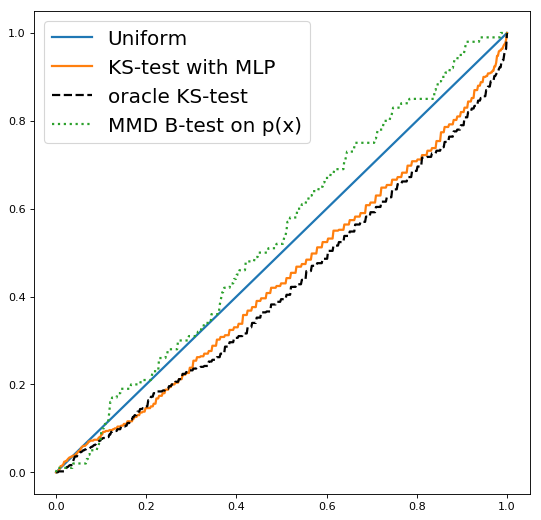

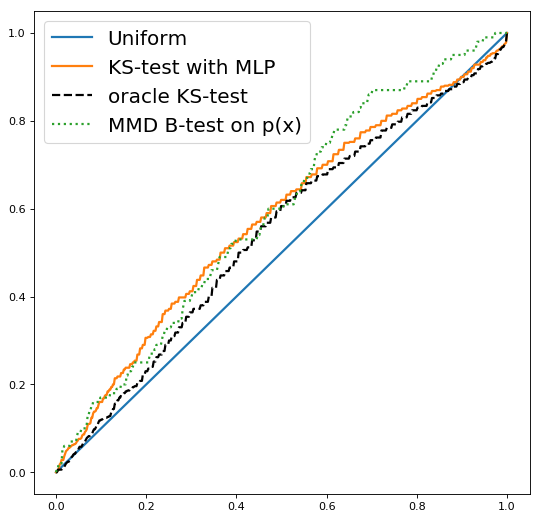

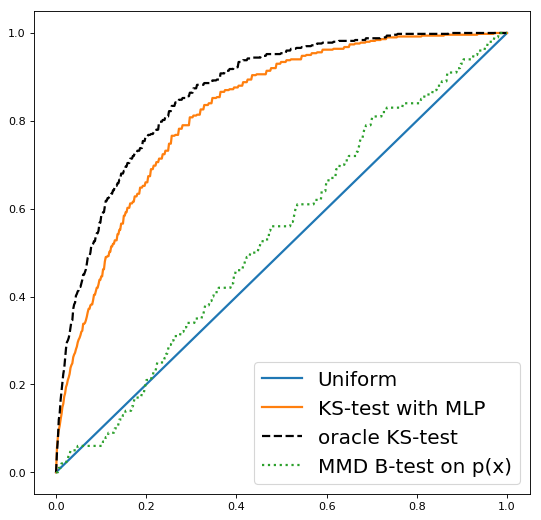

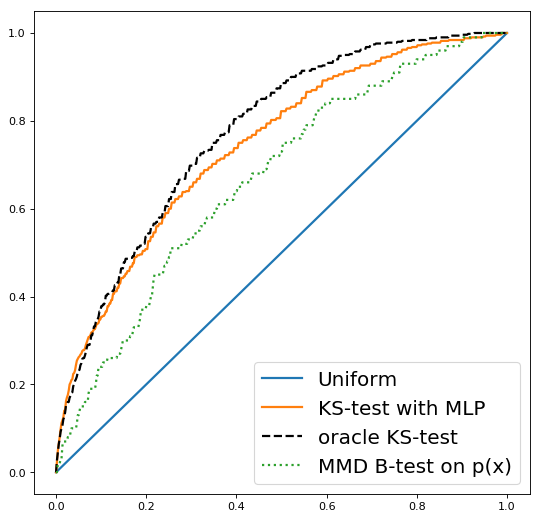

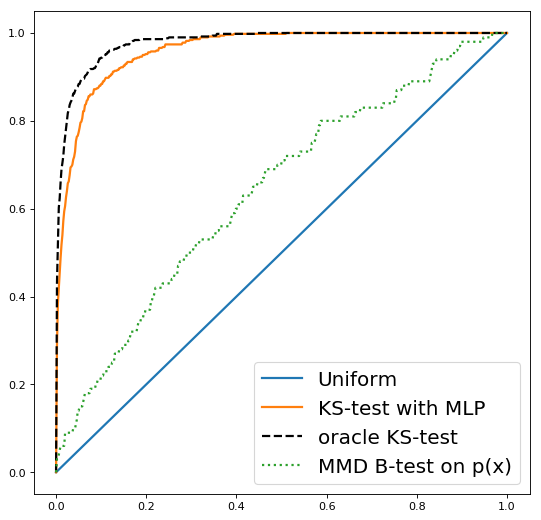

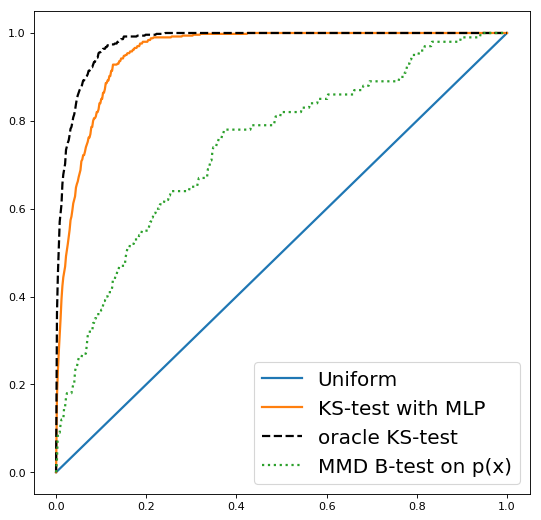

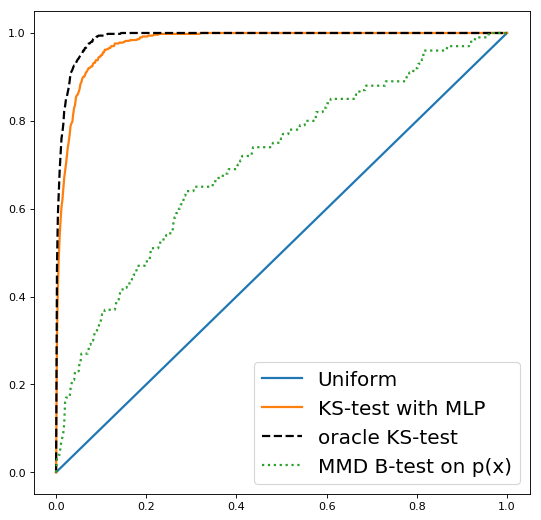

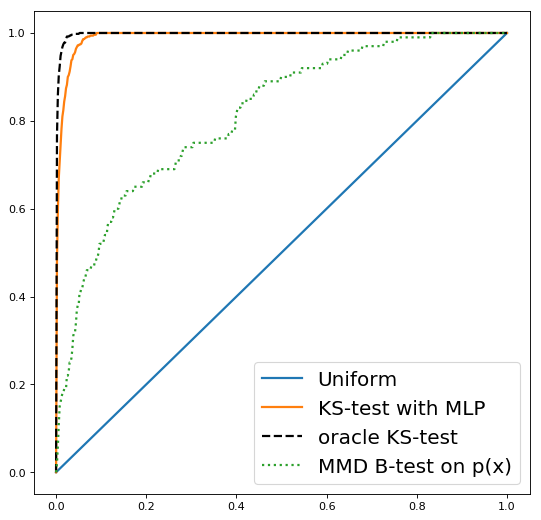

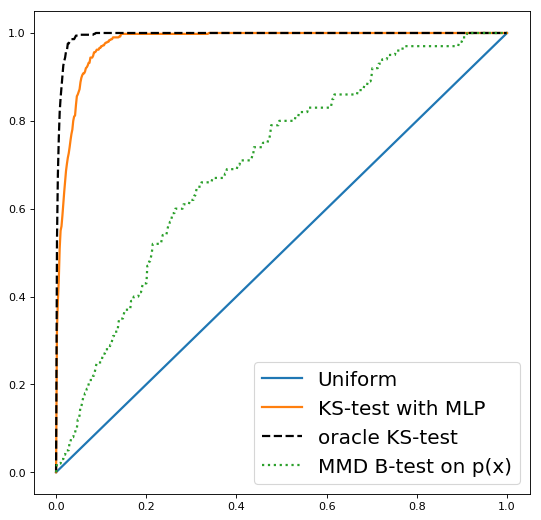

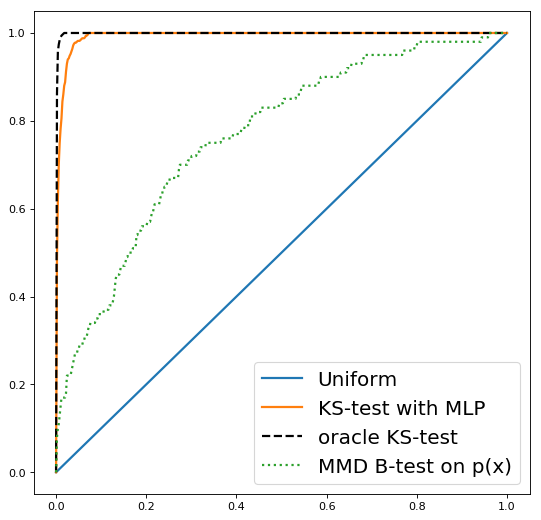

In [22]:
for (delta,item1,item2,item3) in zip(deltalist,cdflist,cdflist_oracle,cdflist_x):
    fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    
    delta = int(delta*10)
    xx=  np.linspace(0, 1, num=500)

    cdfpval = item1
    cdfpval_gnd = item2
    cdfpval_x = item3
    plt.plot(xx, xx,linewidth=2)
    plt.plot(xx, cdfpval(xx),linewidth=2)
    plt.plot(xx, cdfpval_gnd(xx),linewidth=2,color='k',linestyle='--')
    plt.plot(xx, cdfpval_x(xx),linewidth=2,linestyle=':')

    plt.legend(['Uniform', 'KS-test with MLP', 'oracle KS-test','MMD B-test on p(x)'], loc='best',fontsize=18)
    #plt.title('CDF of p-values', fontsize=18)
    fig.savefig("Hypothesis-Testing"+"delta-0"+repr(delta)+".pdf", bbox_inches='tight')

In [37]:
exp_name = 'knockout'
nlen =5 # set to smaller than 5 if the 8000 experiments are not over.

results = pickle.load(open("results_exp_benchmarking_"+exp_name+".p", "rb"), encoding='latin1')
#results_exp_benchmarking_jan30_badpred
#ToPickle = [alpha_range, nlist, num_runs, methods_name, allresults]
#allresults[(alpha,n)].append([results,p_P,p_Q])
#results are {"acc_list": acc_list, "wt_list": wt_list}
# acc_list.append([acc_weighted,C,Cp])




alpha_range = results[0]
nlist = results[1]
num_runs = results[2]

methods_name = results[3]
allresults = results[4]

if len(results) > 5:
    methods_name_fast = results[5]
    num_runs_slow = results[6]
else:
    methods_name_fast = methods_name
    num_runs_slow = num_runs

# also load the extended results
results1 = pickle.load(open("results_exp_benchmarking_"+exp_name+"_extend.p", "rb"), encoding='latin1')
nlist1 = results1[1]
methods_name1 = results1[3]
allresults1 = results1[4]    
    
    
MSE_vs_n = {}
STD_vs_n = {}

ACC_vs_n = {}
ACCSTD_vs_n = {}

RELACC_vs_n = {}
RELACCSTD_vs_n = {}


for alpha in alpha_range:
    for name in methods_name:
        MSE_vs_n[(alpha,name)] = []
        STD_vs_n[(alpha,name)] = []
        ACC_vs_n[(alpha,name)] = []
        ACCSTD_vs_n[(alpha,name)] = []
        RELACC_vs_n[(alpha,name)] = []
        RELACCSTD_vs_n[(alpha,name)] = []
    for n in nlist[:nlen]:
        tmp = allresults[(alpha,n)]
        print(n)
        
        rep_data={}
        for name in methods_name:
            rep_data[("estimation",name)] = []
            rep_data[("testacc",name)] = []
            rep_data[("relacc",name)] = []
            
        for i,exp_results in enumerate(tmp): # enumerate over repeats
                           
            p_P = exp_results[1]
            p_Q = exp_results[2]
            w0 = np.array(p_Q)/np.array(p_P)
            tmp1 = exp_results[0]
            wt_list = tmp1["wt_list"]
            acc_list = tmp1["acc_list"]
            if i >= num_runs_slow:
                methods_name_cur  = methods_name_fast
            else:
                methods_name_cur = methods_name
            for (wt,acc,name) in zip(wt_list,acc_list,methods_name_cur):
                if name is not None:
                    rep_data[("estimation",name)].append(np.sum((wt-w0)**2))
                    rep_data[("testacc",name)].append(acc[0])
                    rep_data[("relacc",name)].append(acc[0]-acc_list[0][0])
                    print(name, " MSE", np.sum((wt-w0)**2), "ACC", acc[0],
                          "relacc", acc[0]-acc_list[0][0])
        for name in methods_name:
            MSE_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("estimation",name)])))
            STD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("estimation",name)]))/np.sqrt(num_runs_slow))
            ACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("testacc",name)])))
            ACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("testacc",name)]))/np.sqrt(num_runs_slow))
            RELACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("relacc",name)])))
            RELACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("relacc",name)]))/np.sqrt(num_runs_slow))
        for name in methods_name_fast: # all fast methods are in the extended set of experiments
            STD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in STD_vs_n[(alpha,name)]]
            ACCSTD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in ACCSTD_vs_n[(alpha,name)]]
            RELACCSTD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in RELACCSTD_vs_n[(alpha,name)]]
    # now do it for the extended experiments
    for n in nlist1[:]:
        tmp = allresults1[(alpha,n)]
        print(n)
        rep_data={}
        for name in methods_name1:
            rep_data[("estimation",name)] = []
            rep_data[("testacc",name)] = []
            rep_data[("relacc",name)] = []
            
        for i,exp_results in enumerate(tmp): # enumerate over repeats
                           
            p_P = exp_results[1]
            p_Q = exp_results[2]
            w0 = np.array(p_Q)/np.array(p_P)
            tmp1 = exp_results[0]
            wt_list = tmp1["wt_list"]
            acc_list = tmp1["acc_list"]
            if i >= num_runs_slow:
                methods_name_cur  = methods_name_fast
            else:
                methods_name_cur = methods_name
            for (wt,acc,name) in zip(wt_list,acc_list,methods_name_cur):
                if name is not None:
                    rep_data[("estimation",name)].append(np.sum((wt-w0)**2))
                    rep_data[("testacc",name)].append(acc[0])
                    rep_data[("relacc",name)].append(acc[0]-acc_list[0][0])
                    print(name, " MSE", np.sum((wt-w0)**2), "ACC", acc[0],
                          "relacc", acc[0]-acc_list[0][0])
        for name in methods_name1:
            MSE_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("estimation",name)])))
            STD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("estimation",name)]))/np.sqrt(num_runs_slow))
            ACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("testacc",name)])))
            ACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("testacc",name)]))/np.sqrt(num_runs_slow))
            RELACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("relacc",name)])))
            RELACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("relacc",name)]))/np.sqrt(num_runs_slow))
        for name in methods_name_fast:
            STD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in STD_vs_n[(alpha,name)]]
            ACCSTD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in ACCSTD_vs_n[(alpha,name)]]
            RELACCSTD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in RELACCSTD_vs_n[(alpha,name)]]
        




500
unweighted  MSE 81.0743801652893 ACC 0.80078125 relacc 0.0
BBSE  MSE 98.52651759541693 ACC 0.80859375 relacc 0.0078125
BBSE-prob  MSE 97.370172253934 ACC 0.8027344 relacc 0.001953125
KMM-Tars  MSE 45.902395803601934 ACC 0.8222656 relacc 0.021484375
unweighted  MSE 81.0743801652893 ACC 0.8066406 relacc 0.0
BBSE  MSE 98.7687897344495 ACC 0.7890625 relacc -0.017578125
BBSE-prob  MSE 97.8372161478828 ACC 0.7910156 relacc -0.015625
KMM-Tars  MSE 31.208521044844545 ACC 0.83203125 relacc 0.025390625
unweighted  MSE 81.0743801652893 ACC 0.8066406 relacc 0.0
BBSE  MSE 99.84987523901611 ACC 0.7890625 relacc -0.017578125
BBSE-prob  MSE 98.7845836733961 ACC 0.7910156 relacc -0.015625
KMM-Tars  MSE 66.70790205234545 ACC 0.8027344 relacc -0.00390625
unweighted  MSE 81.0743801652893 ACC 0.8203125 relacc 0.0
BBSE  MSE 96.997501556571 ACC 0.8046875 relacc -0.015625
BBSE-prob  MSE 99.45195097192412 ACC 0.82421875 relacc 0.00390625
KMM-Tars  MSE 15.41833893999899 ACC 0.8203125 relacc 0.0
unweighted  

BBSE  MSE 98.21649207490762 ACC 0.83928573 relacc -0.06150794
BBSE-prob  MSE 95.74390252045797 ACC 0.84945434 relacc -0.05133933
unweighted  MSE 81.0743801652893 ACC 0.90873015 relacc 0.0
BBSE  MSE 90.65436095901035 ACC 0.8802083 relacc -0.028521836
BBSE-prob  MSE 91.9846588500647 ACC 0.87400794 relacc -0.03472221
unweighted  MSE 81.0743801652893 ACC 0.89905757 relacc 0.0
BBSE  MSE 89.21712122224442 ACC 0.8732639 relacc -0.025793672
BBSE-prob  MSE 96.86959377234568 ACC 0.84449404 relacc -0.054563522
unweighted  MSE 81.0743801652893 ACC 0.88244045 relacc 0.0
BBSE  MSE 98.04303306393595 ACC 0.8484623 relacc -0.033978164
BBSE-prob  MSE 97.24048631480146 ACC 0.8454861 relacc -0.036954343
unweighted  MSE 81.0743801652893 ACC 0.890625 relacc 0.0
BBSE  MSE 95.08970757981506 ACC 0.85168654 relacc -0.038938463
BBSE-prob  MSE 94.56594697237719 ACC 0.85094243 relacc -0.039682567
unweighted  MSE 81.0743801652893 ACC 0.88814485 relacc 0.0
BBSE  MSE 97.29200960529379 ACC 0.8544147 relacc -0.03373015

BBSE  MSE 8.157704137200081 ACC 0.8515625 relacc -0.0078125
BBSE-prob  MSE 8.502287325200404 ACC 0.84472656 relacc -0.0146484375
KMM-Tars  MSE 1.0152428087919232 ACC 0.8691406 relacc 0.009765625
unweighted  MSE 5.491314462512251 ACC 0.875 relacc 0.0
BBSE  MSE 7.518181499567346 ACC 0.85839844 relacc -0.016601562
BBSE-prob  MSE 9.27904446103721 ACC 0.81933594 relacc -0.055664062
unweighted  MSE 5.491314462512251 ACC 0.87597656 relacc 0.0
BBSE  MSE 6.752624411882536 ACC 0.8701172 relacc -0.005859375
BBSE-prob  MSE 8.698933819766102 ACC 0.85839844 relacc -0.017578125
unweighted  MSE 5.491314462512251 ACC 0.8564453 relacc 0.0
BBSE  MSE 9.367699516641283 ACC 0.82128906 relacc -0.03515625
BBSE-prob  MSE 9.338088201300373 ACC 0.81347656 relacc -0.04296875
unweighted  MSE 5.491314462512251 ACC 0.8613281 relacc 0.0
BBSE  MSE 9.812992057383822 ACC 0.80859375 relacc -0.052734375
BBSE-prob  MSE 9.532932718333448 ACC 0.8232422 relacc -0.038085938
unweighted  MSE 5.491314462512251 ACC 0.8623047 relac

BBSE  MSE 0.05531331010582121 ACC 0.96940625 relacc -0.0004374981
BBSE-prob  MSE 0.05938453582004612 ACC 0.9705 relacc 0.00065624714
unweighted  MSE 5.491314462512251 ACC 0.96871877 relacc 0.0
BBSE  MSE 0.09644949876497867 ACC 0.9693437 relacc 0.0006249547
BBSE-prob  MSE 0.02548489328628045 ACC 0.97209376 relacc 0.0033749938
unweighted  MSE 5.491314462512251 ACC 0.9714375 relacc 0.0
BBSE  MSE 0.1759228004884978 ACC 0.96821874 relacc -0.00321877
BBSE-prob  MSE 0.16433400124876588 ACC 0.9711875 relacc -0.00025004148
unweighted  MSE 5.491314462512251 ACC 0.96896875 relacc 0.0
BBSE  MSE 0.16053761898742894 ACC 0.9703125 relacc 0.0013437271
BBSE-prob  MSE 0.007338363842768384 ACC 0.96915627 relacc 0.00018751621
unweighted  MSE 5.491314462512251 ACC 0.9710938 relacc 0.0
BBSE  MSE 0.08250513993912847 ACC 0.9721562 relacc 0.0010624528
BBSE-prob  MSE 0.006539986392208091 ACC 0.9740625 relacc 0.0029687285
unweighted  MSE 5.491314462512251 ACC 0.96621877 relacc 0.0
BBSE  MSE 0.010575880687254322 

BBSE  MSE 0.20123205402997946 ACC 0.94125 relacc -0.005374968
BBSE-prob  MSE 0.21238802363714263 ACC 0.94425 relacc -0.0023750067
unweighted  MSE 1.0249307479224374 ACC 0.94575 relacc 0.0
BBSE  MSE 0.03687297022557515 ACC 0.941375 relacc -0.004374981
BBSE-prob  MSE 0.05968898566623382 ACC 0.941875 relacc -0.0038750172
unweighted  MSE 1.0249307479224374 ACC 0.946625 relacc 0.0
BBSE  MSE 0.03992286405693608 ACC 0.9485 relacc 0.0018749833
BBSE-prob  MSE 0.10321164607002449 ACC 0.948625 relacc 0.0020000339
unweighted  MSE 1.0249307479224374 ACC 0.939375 relacc 0.0
BBSE  MSE 0.10992180922800464 ACC 0.945625 relacc 0.006250024
BBSE-prob  MSE 0.05080292131320041 ACC 0.9435 relacc 0.004124999
unweighted  MSE 1.0249307479224374 ACC 0.951125 relacc 0.0
BBSE  MSE 0.09319014569662831 ACC 0.95325 relacc 0.0021249652
BBSE-prob  MSE 0.12916586526937943 ACC 0.953375 relacc 0.0022499561
unweighted  MSE 1.0249307479224374 ACC 0.94625 relacc 0.0
BBSE  MSE 0.25219288796039874 ACC 0.944875 relacc -0.001375

BBSE  MSE 0.3174267264790123 ACC 0.89697266 relacc 0.0068359375
BBSE-prob  MSE 0.32544382737549704 ACC 0.88720703 relacc -0.0029296875
unweighted  MSE 0.19303871392469596 ACC 0.90966797 relacc 0.0
BBSE  MSE 0.3073661750862536 ACC 0.90771484 relacc -0.001953125
BBSE-prob  MSE 0.31475463476197224 ACC 0.91552734 relacc 0.005859375
unweighted  MSE 0.19303871392469596 ACC 0.9008789 relacc 0.0
BBSE  MSE 0.21296967561258745 ACC 0.9111328 relacc 0.010253906
BBSE-prob  MSE 0.227662347014187 ACC 0.90478516 relacc 0.00390625
unweighted  MSE 0.19303871392469596 ACC 0.88916016 relacc 0.0
BBSE  MSE 0.41258837000648185 ACC 0.8876953 relacc -0.0014648438
BBSE-prob  MSE 0.36184648715010514 ACC 0.890625 relacc 0.0014648438
unweighted  MSE 0.19303871392469596 ACC 0.9033203 relacc 0.0
BBSE  MSE 0.3142603678927125 ACC 0.9091797 relacc 0.005859375
BBSE-prob  MSE 0.2581588716909613 ACC 0.9121094 relacc 0.0087890625
unweighted  MSE 0.19303871392469596 ACC 0.90527344 relacc 0.0
BBSE  MSE 0.37205162757883026 AC

BBSE  MSE 1.2599553928667617 ACC 0.84765625 relacc -0.017578125
BBSE-prob  MSE 1.1746423872192666 ACC 0.8613281 relacc -0.00390625
unweighted  MSE 0.013432504274995122 ACC 0.859375 relacc 0.0
BBSE  MSE 1.000247298388774 ACC 0.8730469 relacc 0.013671875
BBSE-prob  MSE 0.9220103349428759 ACC 0.8496094 relacc -0.009765625
unweighted  MSE 0.013432504274995122 ACC 0.87109375 relacc 0.0
BBSE  MSE 1.0029068973392758 ACC 0.8652344 relacc -0.005859375
BBSE-prob  MSE 0.986566834748029 ACC 0.86328125 relacc -0.0078125
unweighted  MSE 0.013432504274995122 ACC 0.8574219 relacc 0.0
BBSE  MSE 1.0575006342792286 ACC 0.8574219 relacc 0.0
BBSE-prob  MSE 0.9932248278986183 ACC 0.8359375 relacc -0.021484375
unweighted  MSE 0.013432504274995122 ACC 0.84765625 relacc 0.0
BBSE  MSE 1.095611699271221 ACC 0.8535156 relacc 0.005859375
BBSE-prob  MSE 0.9327718937491177 ACC 0.8417969 relacc -0.005859375
1000
unweighted  MSE 0.013432504274995122 ACC 0.8779297 relacc 0.0
BBSE  MSE 0.44449029695693243 ACC 0.88378906

BBSE-prob  MSE 0.015547925125145808 ACC 0.9645625 relacc -0.0030625463
unweighted  MSE 0.013432504274995122 ACC 0.9593125 relacc 0.0
BBSE  MSE 0.012349474211152393 ACC 0.963125 relacc 0.003812492
BBSE-prob  MSE 0.014038502441316197 ACC 0.9620625 relacc 0.0027499795
unweighted  MSE 0.013432504274995122 ACC 0.9651875 relacc 0.0
BBSE  MSE 0.018792097999765087 ACC 0.9659375 relacc 0.00075000525
BBSE-prob  MSE 0.03419459938790214 ACC 0.964875 relacc -0.00031250715
unweighted  MSE 0.013432504274995122 ACC 0.9644375 relacc 0.0
BBSE  MSE 0.010104080701748466 ACC 0.9666875 relacc 0.0022500157
BBSE-prob  MSE 0.013255393400670657 ACC 0.9646875 relacc 0.00025004148
unweighted  MSE 0.013432504274995122 ACC 0.9660625 relacc 0.0
BBSE  MSE 0.023381570411276698 ACC 0.9675625 relacc 0.0015000105
BBSE-prob  MSE 0.011762136823348954 ACC 0.96425 relacc -0.001812458
unweighted  MSE 0.013432504274995122 ACC 0.964125 relacc 0.0
BBSE  MSE 0.011940525687703494 ACC 0.962875 relacc -0.001249969
BBSE-prob  MSE 0.0

[500, 1000, 2000, 4000, 8000, 16000, 32000]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


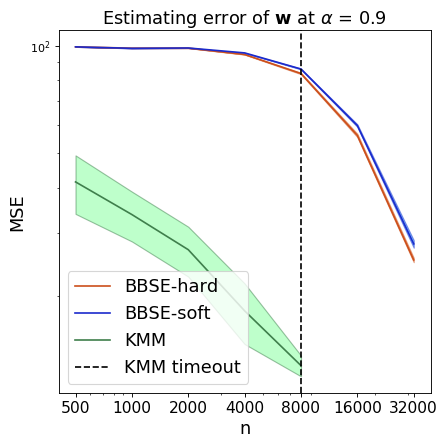

[500, 1000, 2000, 4000, 8000, 16000, 32000]


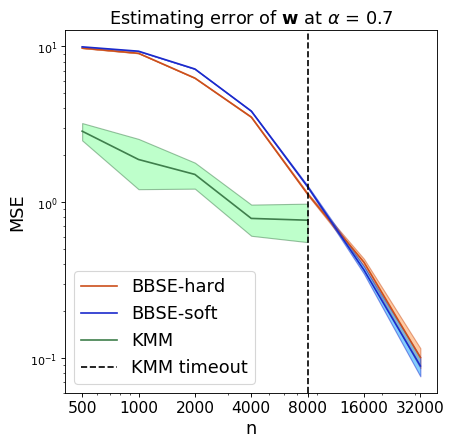

[500, 1000, 2000, 4000, 8000, 16000, 32000]


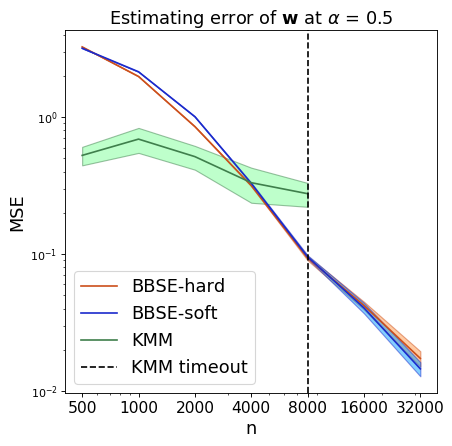

[500, 1000, 2000, 4000, 8000, 16000, 32000]


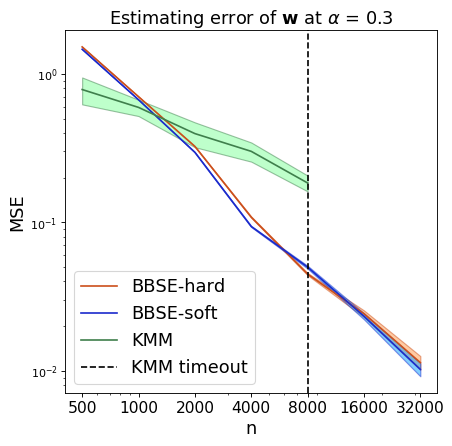

[500, 1000, 2000, 4000, 8000, 16000, 32000]


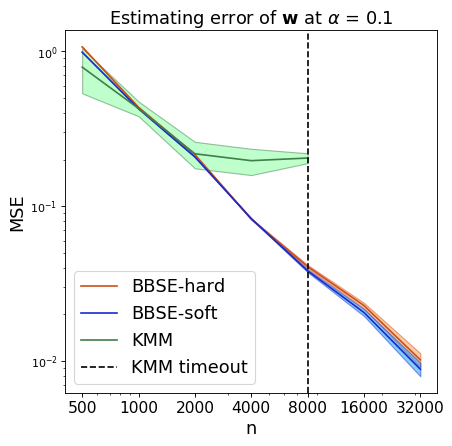

In [38]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    xlong = x + nlist1;
    print(xlong)
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        
        y=np.array(MSE_vs_n[(alpha,name)])
        error = np.array(STD_vs_n[(alpha,name)])
        if len(y) is len(x):
            plt.plot(x, y, 'k', color=colorlist[i-1])
            plt.fill_between(x, y-error, y+error,
                alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])
        else:
            plt.plot(xlong, y, 'k', color=colorlist[i-1])
            plt.fill_between(xlong, y-error, y+error,
                alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])
            
    plt.axvline(x=8000, color='k', linestyle='--')

    legends = methods_name[1:]
    legends = ['BBSE-hard','BBSE-soft', 'KMM','KMM timeout']
    plt.legend(legends,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("MSE", fontsize=16)
    plt.xscale('log')
    plt.xticks(xlong,xlong,fontsize=14)
    plt.yscale('log')
    plt.title(r"Estimating error of $\mathbf{w}$ at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_estimation_alpha_"+repr(alpha)+".pdf", bbox_inches='tight')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


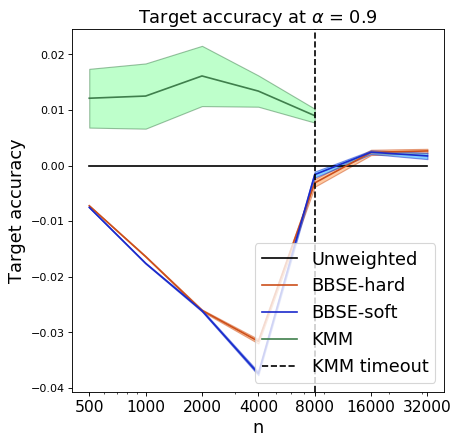

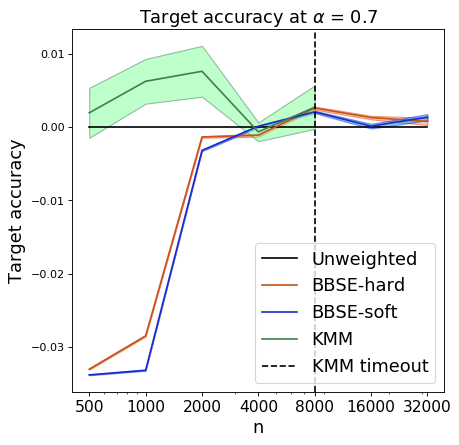

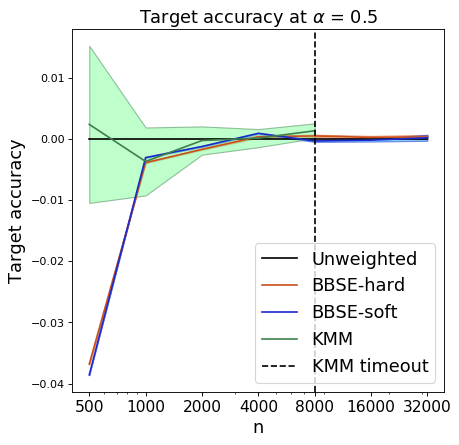

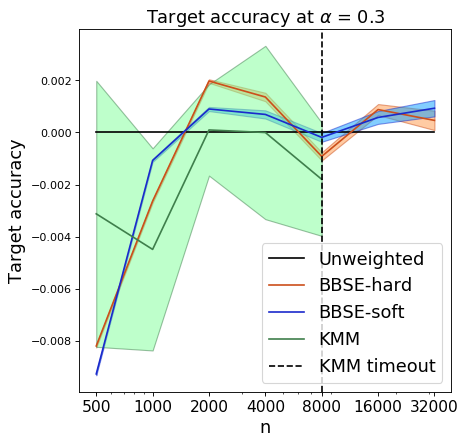

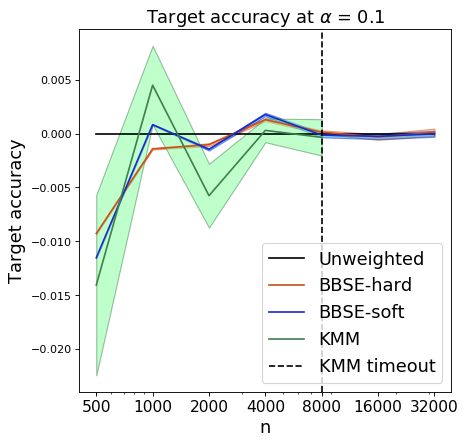

In [39]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    xlong = x + nlist1;
    
    # plot the baseline
    y=np.array(RELACC_vs_n[(alpha,methods_name[0])])
    error = np.array(RELACCSTD_vs_n[(alpha,methods_name[0])])
    plt.plot(xlong, y, 'k')
    plt.fill_between(xlong, y-error, y+error,
                     alpha=0.5)
    
    # plot the relative improvements
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        y=np.array(RELACC_vs_n[(alpha,name)])
        error = np.array(RELACCSTD_vs_n[(alpha,name)])
        if len(y) is len(x):
            plt.plot(x, y, 'k', color=colorlist[i-1])
            plt.fill_between(x, y-error, y+error,
                alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])
        else:
            plt.plot(xlong, y, 'k', color=colorlist[i-1])
            plt.fill_between(xlong, y-error, y+error,
                alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])


    plt.axvline(x=8000, color='k', linestyle='--')
    
    legends = methods_name
    legends = ['Unweighted','BBSE-hard','BBSE-soft', 'KMM','KMM timeout']
    plt.legend(legends,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("Target accuracy", fontsize=16)
    plt.xscale('log')
    plt.xticks(xlong,xlong,fontsize=14)
    #plt.yscale('log')
    plt.title(r"Target accuracy at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_relativeACC_"+repr(alpha)+".pdf", bbox_inches='tight')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


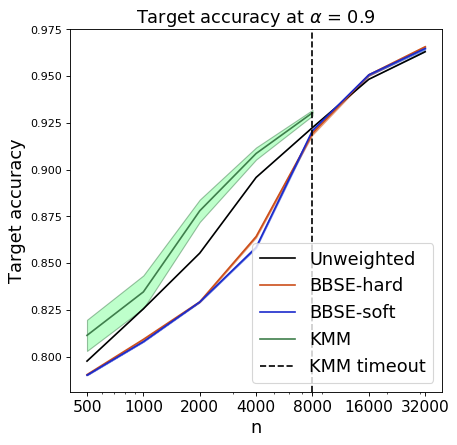

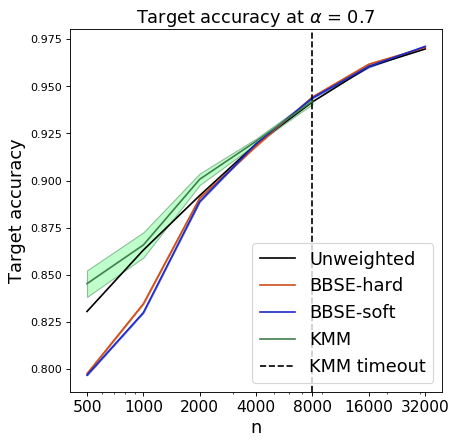

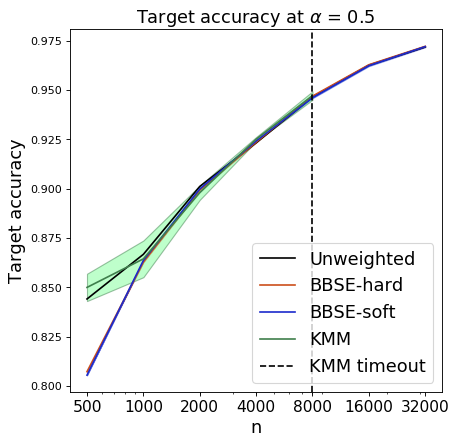

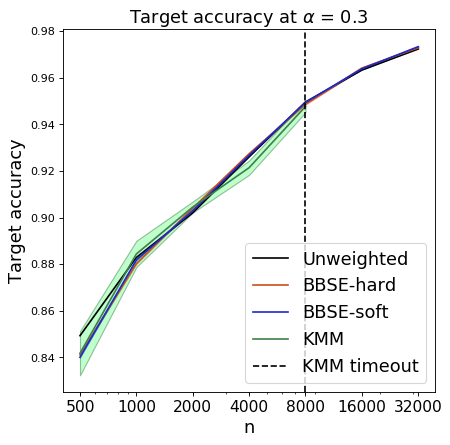

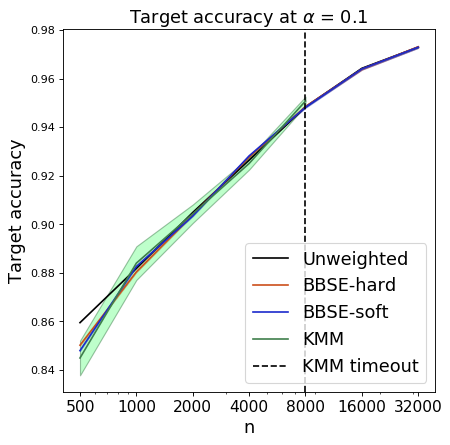

In [40]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    xlong = x + nlist1;
    
    # plot the baseline
    y=np.array(ACC_vs_n[(alpha,methods_name[0])])
    error = np.array(ACCSTD_vs_n[(alpha,methods_name[0])])
    plt.plot(xlong, y, 'k')
    plt.fill_between(xlong, y-error, y+error,
                     alpha=0.5)
    
    # plot the relative improvements
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        y=np.array(ACC_vs_n[(alpha,name)])
        error = np.array(ACCSTD_vs_n[(alpha,name)])
        if len(y) is len(x):
            plt.plot(x, y, 'k', color=colorlist[i-1])
            plt.fill_between(x, y-error, y+error,
                alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])
        else:
            plt.plot(xlong, y, 'k', color=colorlist[i-1])
            plt.fill_between(xlong, y-error, y+error,
                alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])

    plt.axvline(x=8000, color='k', linestyle='--')
    
    legends = methods_name
    legends = ['Unweighted','BBSE-hard','BBSE-soft', 'KMM','KMM timeout']
    plt.legend(legends,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("Target accuracy", fontsize=16)
    plt.xscale('log')
    plt.xticks(xlong,xlong,fontsize=14)
    #plt.yscale('log')
    plt.title(r"Target accuracy at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_ACC_"+repr(alpha)+".pdf", bbox_inches='tight')